## 1. Let's build our Basic Linear regression model using Python

### Step 1: Create our cost function:
Remember our formula,
![alt text](https://spacedatascience.files.wordpress.com/2021/06/mse.png)

In [35]:
def cost_function(m, b, x, y):
    totalError = 0
    for i in range(0, len(x)):
        totalError += (y[i]-(m*x[i]+b))**2
    return totalError/float(len(x))

### Step 2: Implement gradient descent algorithm
* Our error function looks like this
    ![alt text](https://spin.atomicobject.com/wp-content/uploads/linear_regression_error1.png)
* To compute the gradient, we will need to diffferentiate our error function,
    ![alt text](https://spin.atomicobject.com/wp-content/uploads/linear_regression_gradient1.png)
<b> Let's create our gradient descent function </b>

In [36]:
def gradient_descent(b, m, x, y, learning_rate, iterations):
    N = float(len(x))
    # repeat iterations
    for j in range(iterations): 
        b_gradient = 0
        m_gradient = 0
        for i in range(0, len(x)):
            b_gradient += -(2/N) * (y[i] - ((m * x[i]) + b))
            m_gradient += -(2/N) * x[i] * (y[i] - ((m * x[i]) + b))
        b -= (learning_rate * b_gradient)
        m -= (learning_rate * m_gradient)
        # Print error on every 100th iteration 
        if j%100==0:
            print("MSE after " + str(j) + " iterations: " + str(cost_function(m, b, x, y)))
    return [b, m]

### Step 3: Let's create some random data point using linspace

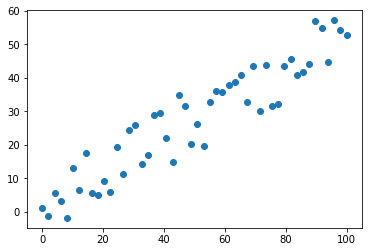

In [37]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 100, 50)
delta = np.random.uniform(-10, 10, x.size)
y = 0.5*x + 3 + delta

plt.scatter(x, y)

### Step 4: Initialize the values

In [38]:
# Defining our learning rate
learning_rate = 0.0001

# defining our initial values of b and m
initial_b = 0
initial_m = 0

# Setting how many iterations we wish to run
total_iterations= 1000

print('Initial MSE:', cost_function(initial_m, initial_b, x, y))
[b, m] = gradient_descent(initial_b, initial_m, x, y, learning_rate, total_iterations)
print('b:', b)
print('m:', m)
print('MSE:', cost_function(m, b, x, y))

Initial MSE: 1033.738361803567
MSE after 0 iterations: 140.0360503267168
MSE after 100 iterations: 33.47820664219185
MSE after 200 iterations: 33.47283322396016
MSE after 300 iterations: 33.46751487332707
MSE after 400 iterations: 33.46225102595151
MSE after 500 iterations: 33.45704112327594
MSE after 600 iterations: 33.45188461246694
MSE after 700 iterations: 33.446780946356625
MSE after 800 iterations: 33.441729583384586
MSE after 900 iterations: 33.43672998754038
b: 0.0800900461504123
m: 0.5438293458322382
MSE: 33.431830860006365


### Step 5: Let's predict the values

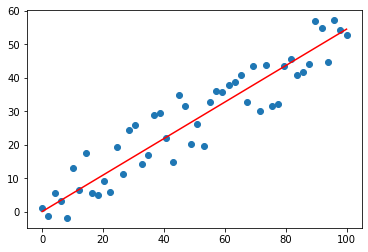

In [39]:
predictions = [(m * x[i]) + b for i in range(len(x))]
plt.scatter(x, y)
plt.plot(x, predictions, color='r')

<b> Now, you can see the regression line drawn perfectly between data points. <b>

## 2. Let's use SkLearn's linear regression model

In [40]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Let's change the shape of x array to the format expected by sklearn
print(x.shape)
x = x.reshape((-1, 1))
print(x.shape)

(50,)
(50, 1)


### Step 1: Create a model object

In [41]:
# Let's create the model object using LinearRegression
model = LinearRegression()

# Fit our model to our input data x and y
model.fit(x, y)

LinearRegression()

### Step 2: Get model parametrs

In [42]:
# Get our model paramters
print('Y intercept:', model.intercept_) #b
print('Gradient:', model.coef_) #m

Y intercept: 1.4422901097728484
Gradient: [0.52360119]


### Step 3: Store all predictions in y_pred

In [43]:
y_pred = model.predict(x)
y

array([ 1.27813191, -1.34372892,  5.61379114,  3.34355892, -1.8184407 ,
       13.18219258,  6.38759153, 17.6648291 ,  5.48701694,  5.04790426,
        9.08342082,  5.95707569, 19.18062339, 11.37686673, 24.37517044,
       25.98131895, 14.25396445, 16.79690463, 28.7256268 , 29.51107234,
       22.11739895, 14.89472023, 34.85387887, 31.53181733, 20.12903956,
       26.1183525 , 19.57283936, 32.68597926, 36.02125163, 35.61851972,
       37.91300934, 38.84651851, 40.7280923 , 32.8514725 , 43.59084088,
       30.17762843, 43.6712991 , 31.43918987, 32.15454211, 43.43426315,
       45.64349791, 40.80350488, 41.55323195, 44.0152637 , 56.83022142,
       54.91757018, 44.80375626, 57.11932323, 54.21664806, 52.77892293])

### Step 4: Let's see how our model works

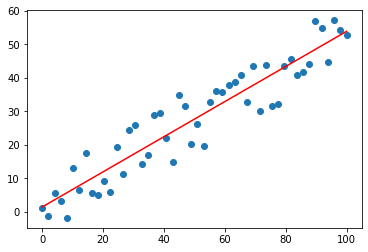

In [44]:
plt.scatter(x, y)
plt.plot(x, y_pred, color='r')

In [45]:
from sklearn.metrics import mean_squared_error 

print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))

Mean squared error: 32.95


### See that? The error rate of both Manual and SkLearn's Linear regression model are almost equal.